In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

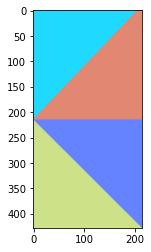

In [2]:
card = cv2.imread('../../cards/no-corner4.png', cv2.COLOR_BGR2RGB)
plt.imshow(card)
plt.show()

In [3]:
height = card.shape[0]
print(height // 5)
colors_id = [i * height // 5 for i in range(1, 5)]
colors_id

85


[85, 171, 256, 342]

In [4]:
half_width = card.shape[1] // 2
colors = [card[i, half_width] for i in colors_id]
colors

[array([ 31, 217, 255], dtype=uint8),
 array([226, 135, 113], dtype=uint8),
 array([102, 131, 255], dtype=uint8),
 array([205, 226, 136], dtype=uint8)]

In [5]:
class Card():
    def __init__(self, color_map):
        self.color_map = color_map
        self.color_enum = self.build_enum(color_map)
        self.color_codes = self.build_color_codes(color_map, self.color_enum)
    
    def build_enum(self, color_map):
        color_map_copy = list(color_map)
        color_enum = {}
        enum_num = 1
        for i, _ in enumerate(color_map):
            color = color_map_copy.pop(0)
            color_enum[enum_num] = color
            
            pixel_in_list = any((color == other_c).all() for other_c in color_map_copy)
            if not pixel_in_list:
                enum_num += 1
        
        return color_enum
    
    def build_color_codes(self, color_map, color_enum):
        color_codes = {}

        for num in color_enum.keys():
            color_codes[num] = ""
            for color in color_map:
                if (color == color_enum[num]).all():
                    color_codes[num] += "1"
                else:
                    color_codes[num] += "0"
        
        return color_codes

In [6]:
card_obj = Card(colors)
print(card_obj.color_enum)
print(card_obj.color_codes)

{1: array([ 31, 217, 255], dtype=uint8), 2: array([226, 135, 113], dtype=uint8), 3: array([102, 131, 255], dtype=uint8), 4: array([205, 226, 136], dtype=uint8)}
{1: '1000', 2: '0100', 3: '0010', 4: '0001'}
